<a href="https://colab.research.google.com/github/HenriqueFurtado-Dev/Stefanini/blob/main/AnaliseDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratório - Titanic

<br>
Selecionamos a base de dados sobre o TITANIC após passar algumas bases, e nossa escolha foi baseada na facilidade em lidar com os dados e definir objetivos. Para a próxima entrega, selecionaremos uma DF mais complexa.

---

<br>

### Objetivo (Business Understanding)
O nosso objetivo principal é analisar os dados do Titanic para entender os fatores que influenciaram a sobrevivência dos passageiros, como seu gênero, classe social, entre outros fatores.

E após realizar criação dos gráficos e analisar os dados, criar um modelo que consiga realizar predições sobre a sobrevivencia de um determinado passageiro com base nas informações treinadas.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando bibliotecas

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [ ]:
# Importando o DF
df_titanic = pd.read_csv('titanic.csv')

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Verificando os primeiros dados
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Contabilizando dados do  dataset
df_titanic.shape

(891, 12)

In [ ]:
df_titanic.size

10692

In [ ]:
# Contabilizando valores da coluna
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
# Verificando dados faltantes
df_faltantes = df_titanic.isnull().sum()
df_faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Entedendo os dados (Data Understanding)

Definir os objetivos que será solucionado e entendimento dos Dados.

Nessa etapa começamos a ter as primeiras interações com a base de dados e validar se os dados estão coerentes para o objetivo previsto da criação de um modelo que seja capaz de definir a sobrevivencia de uma pessoa

In [ ]:
colunas_num = df_titanic.select_dtypes(include=['int64', 'float64']).columns
df_titanic[colunas_num] = df_titanic[colunas_num].fillna(df_titanic[colunas_num].mean())

In [ ]:
colunas_string = df_titanic.select_dtypes(include='object').columns
df_titanic[colunas_string] = df_titanic[colunas_string].fillna('Unknown')

In [ ]:
# Verificando novamente os valores nulos/faltantes
print(df_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


## Explorando e visualizando os dados

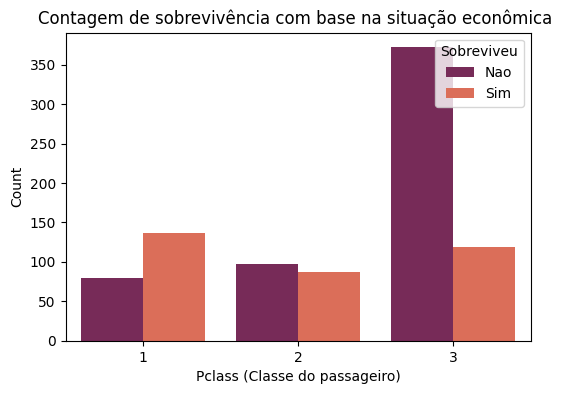

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df_titanic, palette='rocket')
plt.title('Contagem de sobrevivência com base na situação econômica ')
plt.xlabel('Pclass (Classe do passageiro)')
plt.ylabel('Count')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Nao', 'Sim'])
plt.show()

### Interpretação do gráfico gerado

Nesse gráfico podemos visualizar de forma descrepante a taxa de sobrevivência, que se mostrou muito menor na 3 classe

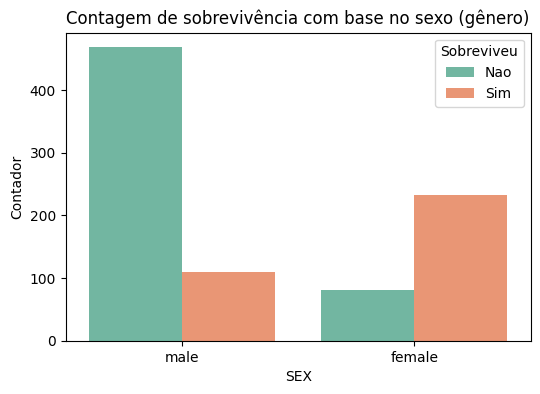

In [ ]:
# Visualizando a sobrevivência com base no sexo (gênero)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df_titanic, palette='Set2')
plt.title('Contagem de sobrevivência com base no sexo (gênero)')
plt.xlabel('SEX')
plt.ylabel('Contador')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Nao', 'Sim'])
plt.show()

### Interpretação do gráfico gerado

A taxa de sobrevivencia entre as mulheres foi consideralvemente maior em relação aos homens

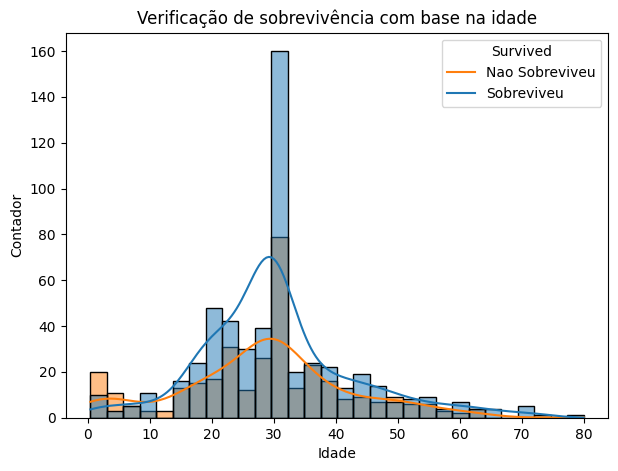

In [ ]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', kde=True, data=df_titanic)
plt.title('Verificação de sobrevivência com base na idade')
plt.xlabel('Idade')
plt.ylabel('Contador')
plt.legend(title='Survived', loc='upper right', labels=['Nao Sobreviveu', 'Sobreviveu'])
plt.show()

### Interpretação do gráfico gerado

Um ponto a ser levado em consideração é a quantidade de pessoas por faixa etária que é maior na casa dos 30 anos.

Em quantidade foram as pessoas com maior número de sobrevivência e não sobrevivência, mas as pessoas mais proximas do 0 anos de idade tiveram uma alta taxa de mortalidade

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [ ]:
# Dropando as colunas que não serão usada para treinar o modelo (as colunas abaixo não irão influenciar no treinamento)
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

df_clean = df_titanic.drop(columns=columns_to_drop)

In [ ]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## Checando a correlação de dados

In [ ]:
# Usando o LabelEncoder para converter sexo para valores
label_encoder = LabelEncoder()
df_clean['Sex'] = label_encoder.fit_transform(df_clean['Sex'])

<Axes: >

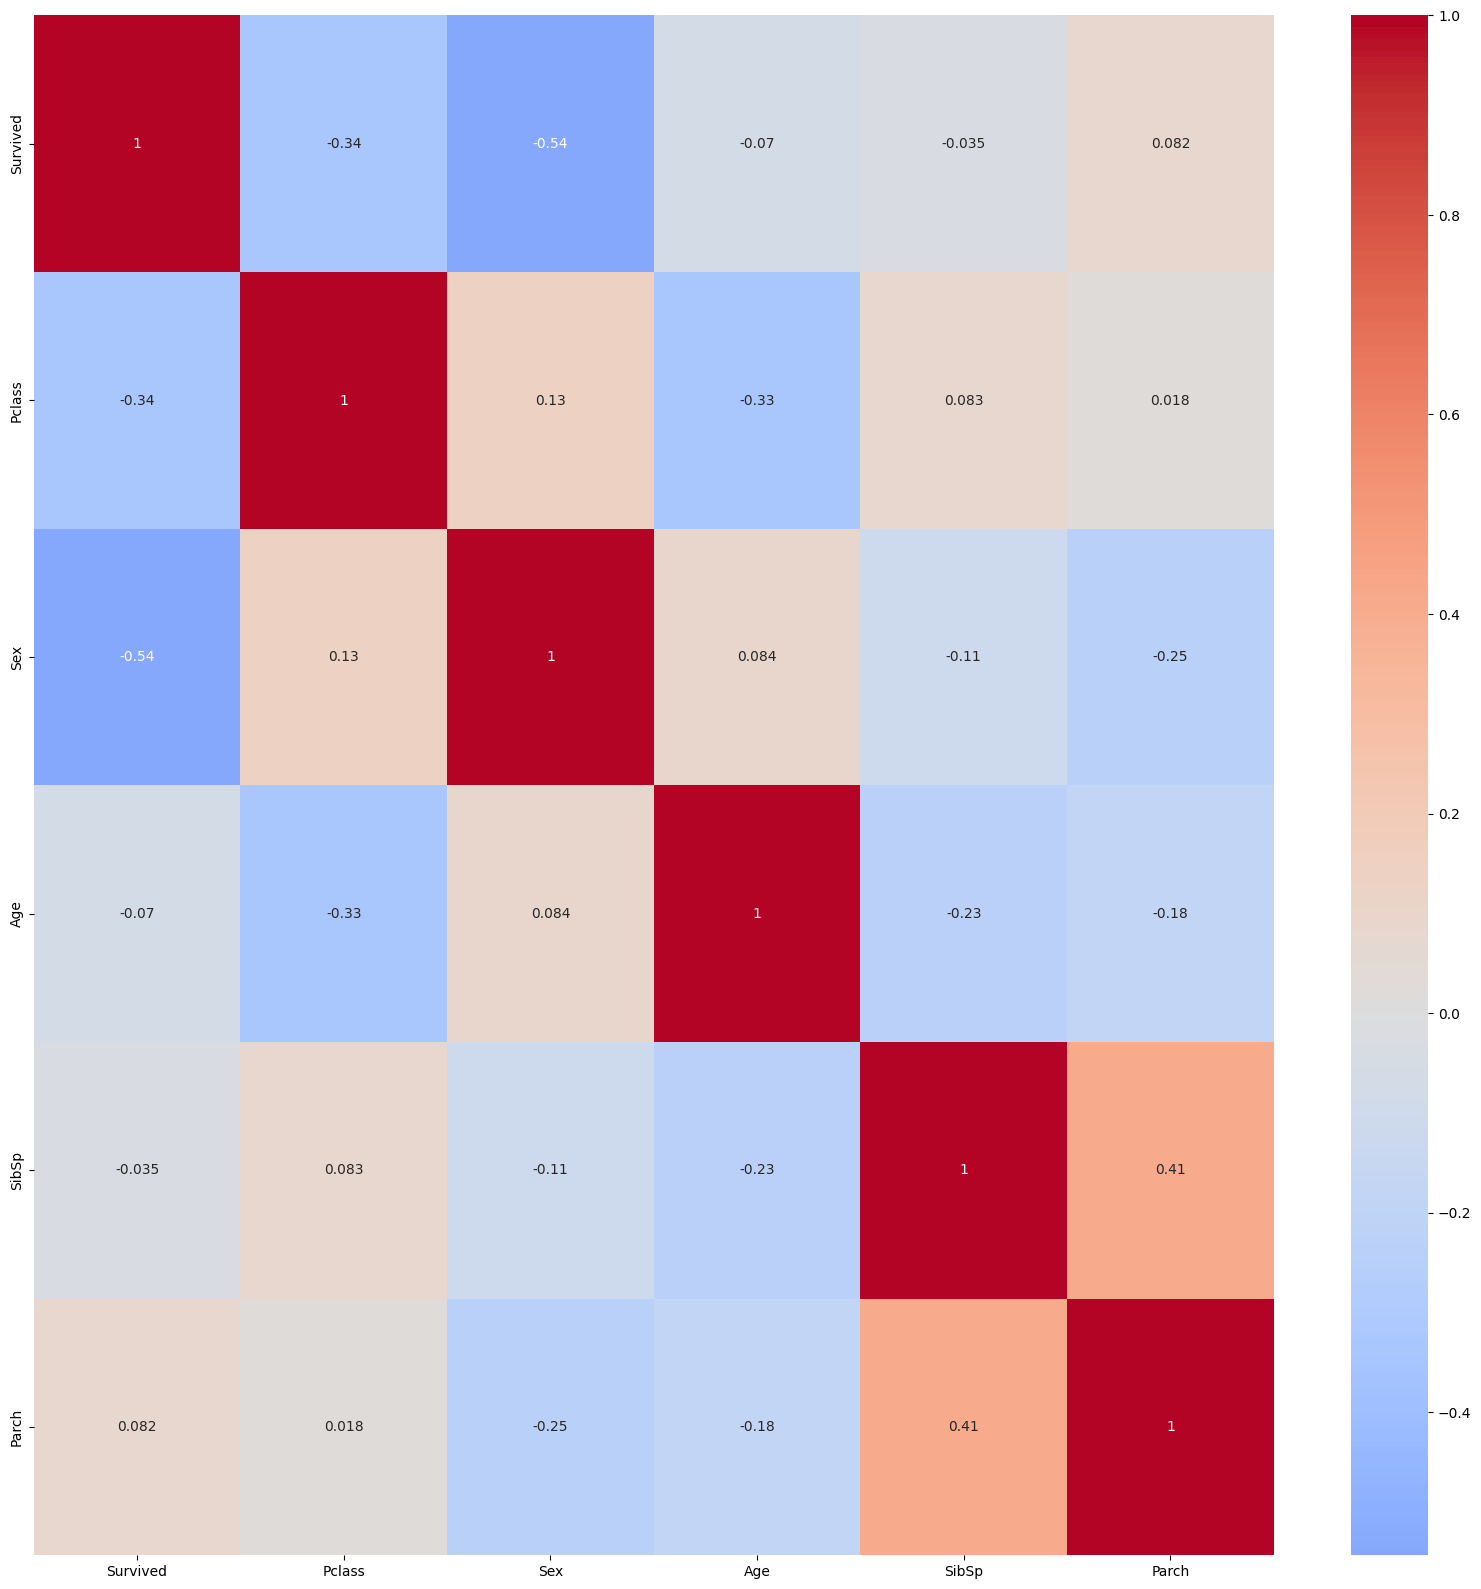

In [ ]:
# Exibindo as correlações
corr = df_clean.corr()

fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap="coolwarm", annot=True, center=0)

In [ ]:
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [ ]:
# Separando features e target
X = df_clean.drop('Survived', axis=1)

# O nosso objetivo será trazer se o passageiro sobreviveria
y = df_clean['Survived']

In [ ]:
# Separando valores de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Treinando o modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
# Testando a acuracia
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acuracia:", accuracy)

Acuracia: 0.7597765363128491


In [ ]:
# Calculando precisão
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

Precisão: 0.7313432835820896


In [ ]:
# Calculando recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.6621621621621622


In [ ]:
# Calculando F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.6950354609929078


In [ ]:
# Calculando matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[87 18]
 [25 49]]


In [ ]:
# Professor fique com dúvida nessa parte referente a qual a forma certa de validar esses dados "manualmente"

# FTestar o conjunto de teste
y_pred_test = model.predict(X_test)

# Exibir o resultado
print("Predict do conjunto de teste:")
print(y_pred_test)


Predict do conjunto de teste:
[0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0]


### Validando os parametros

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [10, 20, 30]
}

model = DecisionTreeClassifier()

# Validação cruzada
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)


Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_leaf': 20}


In [ ]:
# Criando o modelo com os melhores hiperparâmetros
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [ ]:
# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)


Acurácia: 0.7821229050279329
Precisão: 0.8070175438596491
Recall: 0.6216216216216216
F1-score: 0.7022900763358778
Matriz de Confusão:
[[94 11]
 [28 46]]


<Figure size 1000x600 with 0 Axes>

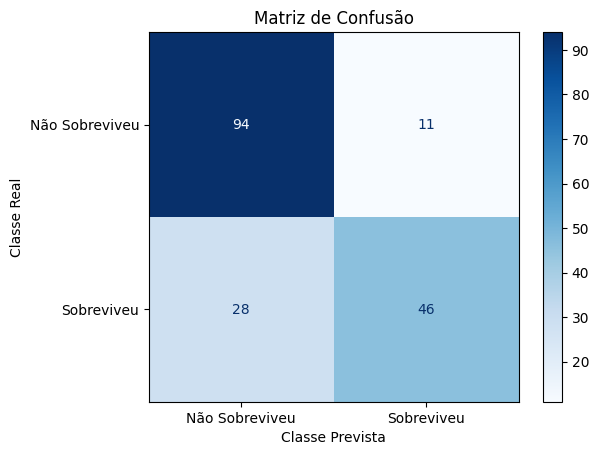

In [ ]:
# Exibindo a matrix de confusão
figure = plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Não Sobreviveu', 'Sobreviveu'])
disp.plot(values_format='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()


### Selecionar e aplicar algum modelo de aprendizado de maquina

Abaixo utilizamos os scripts utilizados em aula para validar nosso modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_predicoes = knn.predict(X_test)

print(classification_report(y_test, y_predicoes))


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [ ]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Passo 4 - Treinar o Classificador
dtree = DecisionTreeClassifier() # Criando classificador (sem nenhum hiperparametro)
dtree.fit(X_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = dtree.predict(X_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       105
           1       0.73      0.66      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Passo 4 - Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(X_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = rf.predict(X_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# Máquina de Vetor Suporte
from sklearn.svm import SVC

# Passo 4 - Treinar o Classificador
svm = SVC() # Criando classificador (sem nenhum hiperparametro)
svm.fit(X_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = svm.predict(X_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       105
           1       0.83      0.07      0.13        74

    accuracy                           0.61       179
   macro avg       0.72      0.53      0.44       179
weighted avg       0.70      0.61      0.49       179

